Epoch 1/60
16/16 [==============================] - 2s 42ms/step - loss: 3.7022 - accuracy: 0.0219 - val_loss: 3.6993 - val_accuracy: 0.0000e+00
Epoch 2/60
16/16 [==============================] - 1s 34ms/step - loss: 3.6896 - accuracy: 0.0312 - val_loss: 3.7066 - val_accuracy: 0.0000e+00
Epoch 3/60
16/16 [==============================] - 1s 32ms/step - loss: 3.6879 - accuracy: 0.0219 - val_loss: 3.7154 - val_accuracy: 0.0000e+00
Epoch 4/60
16/16 [==============================] - 1s 32ms/step - loss: 3.6850 - accuracy: 0.0219 - val_loss: 3.7297 - val_accuracy: 0.0000e+00
Epoch 5/60
16/16 [==============================] - 1s 33ms/step - loss: 3.6835 - accuracy: 0.0188 - val_loss: 3.7403 - val_accuracy: 0.0000e+00
Epoch 6/60
16/16 [==============================] - 1s 32ms/step - loss: 3.6818 - accuracy: 0.0312 - val_loss: 3.7509 - val_accuracy: 0.0000e+00
Epoch 7/60
16/16 [==============================] - 1s 33ms/step - loss: 3.6796 - accuracy: 0.0250 - val_loss: 3.7548 - val_accura

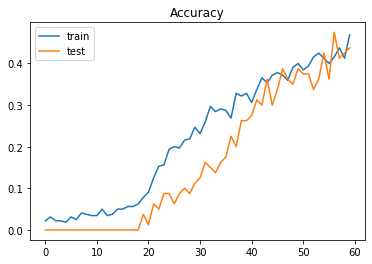

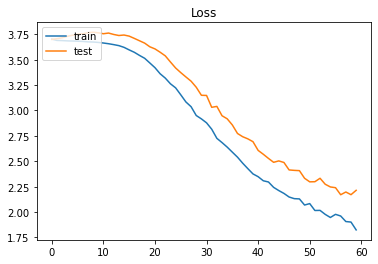

In [ ]:
# MLPでfetch_olivetti_facesの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# ×:from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 入力と出力を指定
in_size = 64 * 64
out_size = 40

# fetch_olivetti_facesデータセットを読み込む
faces = datasets.fetch_olivetti_faces()

X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# データを64*64=4096の一次元配列に変換
X_train = X_train.reshape(-1, 4096).astype('float32') / 255
X_test = X_test.reshape(-1, 4096).astype('float32') / 255

# データのOneHotエンコーディング
from tensorflow.keras import utils as np_utils

y_train = np_utils.to_categorical(y_train.astype('int32'))
y_test = np_utils.to_categorical(y_test.astype('int32'))


# MLPモデル構造を定義
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))

# モデルをコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行
hist = model.fit(X_train, y_train,
          batch_size=20, 
          epochs=60,
          verbose=1,
          validation_data=(X_test, y_test))

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()